# Explore disaster dataset visually

### Setup

In [4]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
filepath_source_all = Path("data/processed/disaster/disaster-all.csv")
filepath_source_global = Path("data/processed/disaster/disaster-global.csv")
filepath_source_country = Path('data/processed/disaster/disaster-country.csv')
filepath_source_region = Path("data/processed/disaster/disaster-region.csv")

## Global disaster data

In [5]:
dis_global = pd.read_csv(filepath_source_global)

### Basic understanding

In [6]:
dis_global.shape

(14871, 5)

In [7]:
dis_global.dtypes

Unnamed: 0     int64
year           int64
type          object
subtype       object
deaths         int64
dtype: object

In [8]:
dis_global.head(8)

,Unnamed: 0,year,type,subtype,deaths
0,0,1900,Drought,Drought,11000
1,1,1900,Drought,Drought,1250000
2,3,1902,Earthquake,Ground movement,2000
3,4,1902,Volcanic activity,Ash fall,1000
4,5,1902,Volcanic activity,Ash fall,6000
5,6,1903,Mass movement (dry),Rockfall,76
6,7,1903,Volcanic activity,Ash fall,17
7,10,1904,Storm,Tropical cyclone,0


### Feature understanding

How often do the various types of natural disaster occur ?

In [9]:
dis_global["type"].value_counts()

Flood                    5744
Storm                    4582
Earthquake               1579
Drought                   792
Landslide                 792
Extreme temperature       607
Wildfire                  453
Volcanic activity         270
Mass movement (dry)        48
Glacial lake outburst       3
Fog                         1
Name: type, dtype: int64

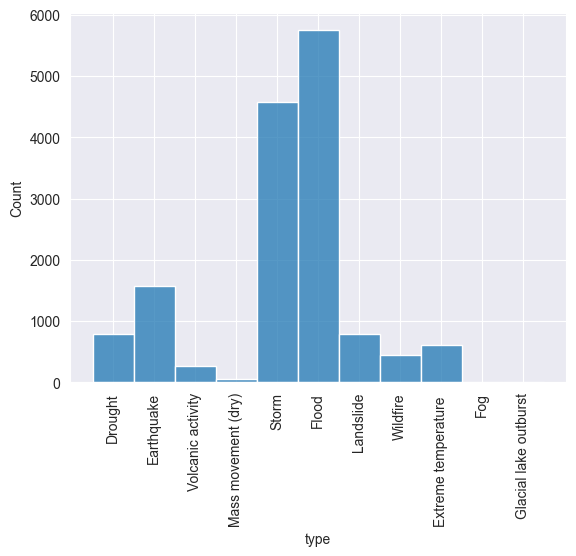

In [10]:
hist = sns.histplot(data=dis_global, x="type")
hist.tick_params(axis='x', rotation=90)
plt.show()

Storms and Floods occur by far the most often while disasters like droughts, earthquakes occur fewer times.
The other types of disasters are very rare with only 3 recorded observations of glacial lake outbursts.
Living next to the water seems to be dangerous !

Which types of natural disasters cause the most deaths ?

In [11]:
dis_deaths_by_type = dis_global.groupby(["type"])
dis_deaths_by_type = dis_deaths_by_type.agg('sum').drop("year", axis=1)
dis_deaths_by_type

/var/folders/m4/prj94mxs4pn6lk9nc4z7vrc80000gn/T/ipykernel_8193/957348959.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dis_deaths_by_type = dis_deaths_by_type.agg('sum').drop("year", axis=1)


,Unnamed: 0,deaths
type,,
Drought,8917468,11733889
Earthquake,19077347,2343912
Extreme temperature,8837638,194056
Flood,82000365,7002992
Fog,395,4000
Glacial lake outburst,74626,262
Landslide,9554692,67477
Mass movement (dry),377837,4644
Storm,55547185,1403609


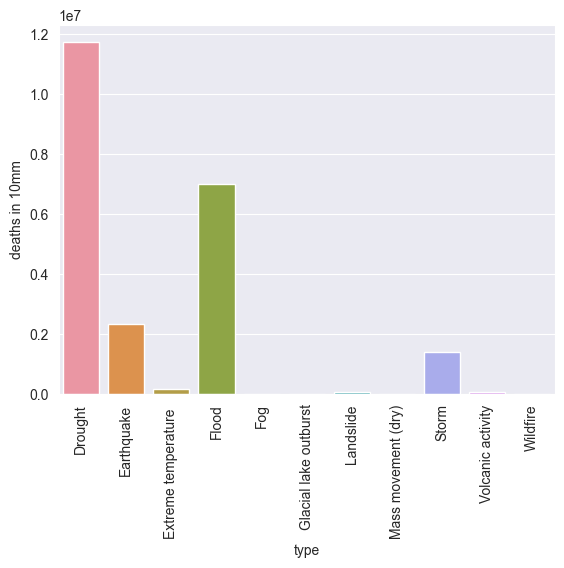

In [12]:
barplot = sns.barplot(data=dis_deaths_by_type.reset_index(), x="type", y="deaths")
barplot.tick_params(axis='x', rotation=90)
barplot.set_ylabel("deaths in 10mm")
plt.show()

As expected the cumulative deaths by flood are high with around 7 million people dying in the last 100 years.
The most significant insight here is that droughts have the highest death toll of all disasters with almost 11 mio people dying in the same timeframe. This is remarkable since droughts were only the fifth most common disaster. Storms, which occurred almost als often as floods have a relatively low death toll and are even superseded by the number of people dying from earthquakes.

The lethality of droughts is the most surprising or in this case shocking point.
More people dyed from droughts, probably following week long starvation, than from all other disasters combined.
There is one caveat though: Droughts can not only be the result of natural events but rather can be and have been caused by political failure or even have been weaponized by states.

We can also indentify the following types as the main contributors to human deaths by natural disasters:

- Drought
- Flood
- Earthquake
- Storm

We will take a closer look at those types of disasters in the following.


So lets see what the most lethal disasters of the last one hundred years have been

In [13]:
dis_global.sort_values(by="deaths", ascending = False).drop("subtype", axis=1).head(10)

,Unnamed: 0,year,type,deaths
95,176,1931,Flood,3700000
81,154,1928,Drought,3000000
272,499,1959,Flood,2000000
137,288,1943,Drought,1900000
354,603,1965,Drought,1500000
130,272,1942,Drought,1500000
1,1,1900,Drought,1250000
849,1262,1921,Drought,1200000
123,250,1939,Flood,500000
48,100,1920,Drought,500000


The 10 most lethal disasters from the last 100 years have exclusively been floods and droughts.

The number one spot is a flood which happened 1931 in China and is known as one of the deadliest disasters of all time.

## Changes over time

### Frequeny

How did the frequency of natural disasters change over time ?

In [14]:
dis_freq_per_year = dis_global.groupby('year').agg('count').drop(["subtype", "deaths"], axis=1)
dis_freq_per_year.rename(columns={'type':'recorded disasters'}, inplace=True)

In [15]:
dis_freq_per_year.head(8)

,Unnamed: 0,recorded disasters
year,,
1900,6,6
1901,1,1
1902,10,10
1903,12,12
1904,4,4
1905,8,8
1906,13,13
1907,2,2


In [16]:
dis_freq_per_year.tail(8)

,Unnamed: 0,recorded disasters
year,,
2015,384,384
2016,324,324
2017,344,344
2018,320,320
2019,396,396
2020,395,395
2021,430,430
2022,340,340


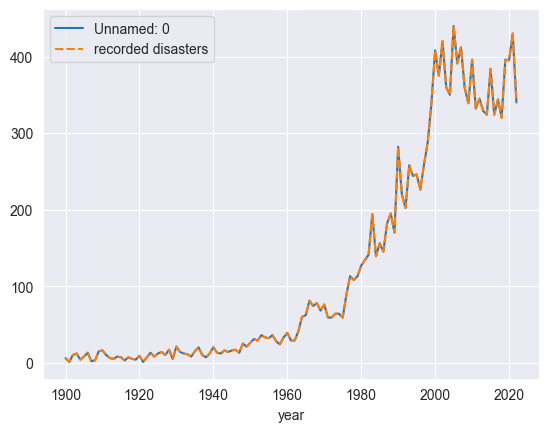

In [17]:
sns.lineplot(data = dis_freq_per_year)
plt.show()

We can clearly see that the number of recorded disasters skyrocketed over the last 100 years.
This is most likely not because there are this much more disasters happening (which affected people), but rather due to states or other institutions increasing their monitoring and taking recording of natural disasters seriously.

### Death toll

In [18]:
dis_freq_per_year = dis_global.groupby('year').agg('count').drop(["subtype", "deaths"], axis=1)
dis_freq_per_year.rename(columns={'type':'recorded disasters'}, inplace=True)

Are there differences in the number of recorded incidents for different types of disasters ?

### Droughts

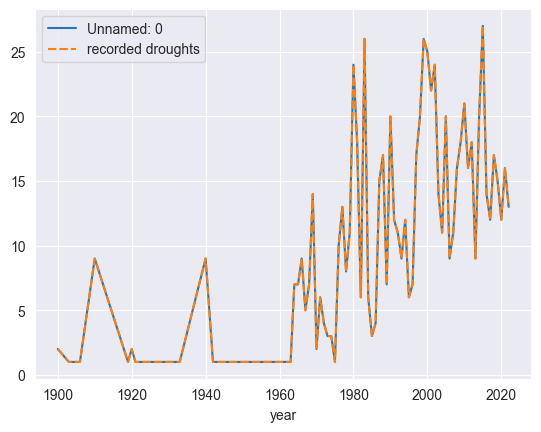

In [19]:
dis_droughts_per_year = dis_global[dis_global.type=="Drought"].groupby('year').agg('count').drop(["subtype", "deaths"], axis=1)
dis_droughts_per_year.rename(columns={'type':'recorded droughts'}, inplace=True)
sns.lineplot(data = dis_droughts_per_year)
plt.show()

### Floods

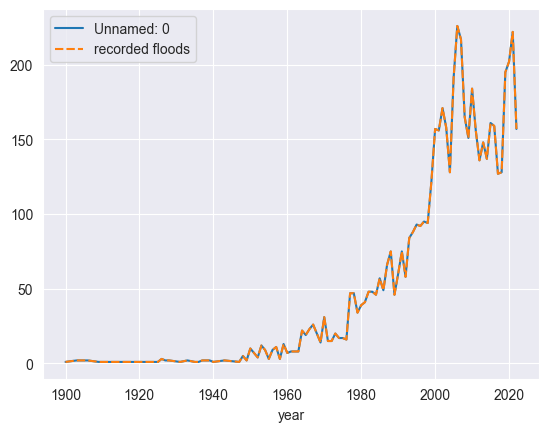

In [20]:
dis_floods_per_year = dis_global[dis_global.type=="Flood"].groupby('year').agg('count').drop(["subtype", "deaths"], axis=1)
dis_floods_per_year.rename(columns={'type':'recorded floods'}, inplace=True)
sns.lineplot(data = dis_floods_per_year)
plt.show()

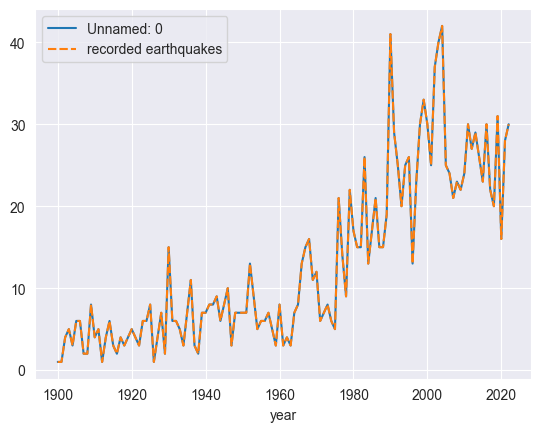

In [21]:
dis_earthquakes_per_year = dis_global[dis_global.type=="Earthquake"].groupby('year').agg('count').drop(["subtype", "deaths"], axis=1)
dis_earthquakes_per_year.rename(columns={'type':'recorded earthquakes'}, inplace=True)
sns.lineplot(data = dis_earthquakes_per_year)
plt.show()

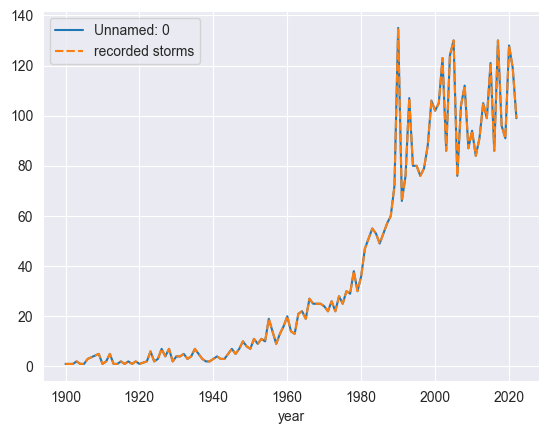

In [22]:
dis_storms_per_year = dis_global[dis_global.type=="Storm"].groupby('year').agg('count').drop(["subtype", "deaths"], axis=1)
dis_storms_per_year.rename(columns={'type':'recorded storms'}, inplace=True)
sns.lineplot(data = dis_storms_per_year)
plt.show()